In [1]:
from ipynb.fs.defs.cml_functions import *
from time import sleep
from datetime import datetime
from linetimer import CodeTimer

In [28]:
def cml_analyse(path,plot_save_path='cm_analysis/',search_radius=2):
    name = os.path.basename(os.path.splitext(path)[0])
    data = open_cm_log(path)
    # STEP 1: Rough geographic selection 
    position_list = extract_json_positions(data)
    positions_city = get_points_within_window(position_list)
    # Second round
    median = np.median(positions_city,axis=0)
    p0 = get_points_in_circle(positions_city, median, radius_km=search_radius)

    #plt.plot(median[1],median[0],'xr',ms=20)
    #plt.plot(p0[:,1],p0[:,0],'.') #plot longitude, latitude
    #mplleaflet.display()
    # STEP 2: Filter points belonging to train
    p1,D1=filter_train(p0,n_next=5,crit_thr=2)
    # STEP 3: Sort out outliers within train by taking median of 3 neighboring points
    p1_avg,D1_avg = median_with_nearest(p1,D1,n=3)
    # STEP 4: Sort points
    p2,D2 = sort_points(p1_avg,D1_avg)
    # STEP 5: Snap points to road
    #match0NoLoop,match0Unique = osrm_match(p2[:,:])
    
    if plot_save_path:
        # Create result plot
        plt.plot(positions_city[:,1],positions_city[:,0],'b.')
        plt.plot(p0[:,1],p0[:,0], 'xk')
        plt.plot(p2[:,1],p2[:,0], 'ok')
        # print('With loops:',getPathLength(match0Unique))
        # print('Loops removed:',getPathLength(match0NoLoop))
        #plt.plot(match0Unique[:,1],match0Unique[:,0],'b-')
        #plt.plot(match0NoLoop[:,1],match0NoLoop[:,0],'r-',linewidth=3)
        #mplleaflet.display(fig=f)
        mplleaflet_update(path=os.path.join(plot_save_path,name+'.html'))
    results = dict()
    results['p0'] = p0
    results['p1'] = p1
    results['p1_avg'] = p1_avg
    results['p2'] = p2
    results['trivial_length'] = getPathLength(p2)
    results['name'] = name
    results['date'] = datetime.strptime(os.path.splitext(name)[0],'%Y%m%d_%H%M%S')
    #results['osmr_length'] = getPathLength(match0NoLoop)
    return results

#cml_analyse('cm_logs/20220624_210255.txt')
#results = cml_analyse('cm_logs/20220624_203957.txt')
with CodeTimer('All'):
    results = cml_analyse('cm_logs/20220624_215158.txt',plot_save_path='')

Code block 'All' took: 42.74850 ms


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200


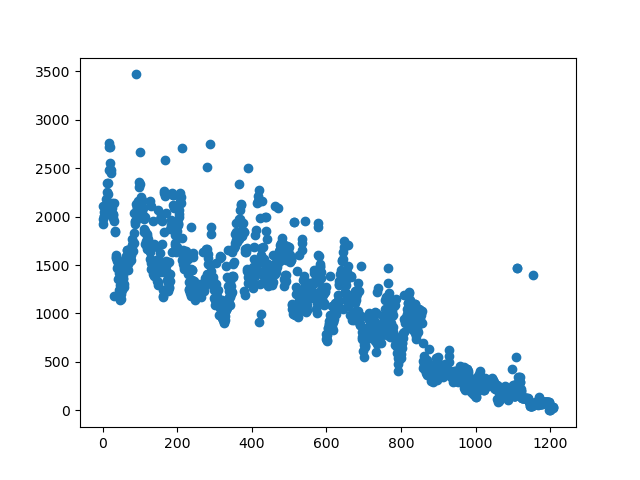

In [32]:
results_all = dict()
for ii,entry in enumerate(os.scandir('cm_logs')):
    if ii%1==0:
        if entry.path.endswith(".txt"):
            #print(entry.path)
            result = cml_analyse(entry.path,plot_save_path='')
            for k in result:
                if k not in results_all:
                    results_all[k] = []
                results_all[k].append(result[k])
            #sleep(1)
    if ii%50==0:
        print(ii)
%matplotlib widget
#plt.figure(figsize=(20,10))
plt.plot(results_all['trivial_length'],'o')

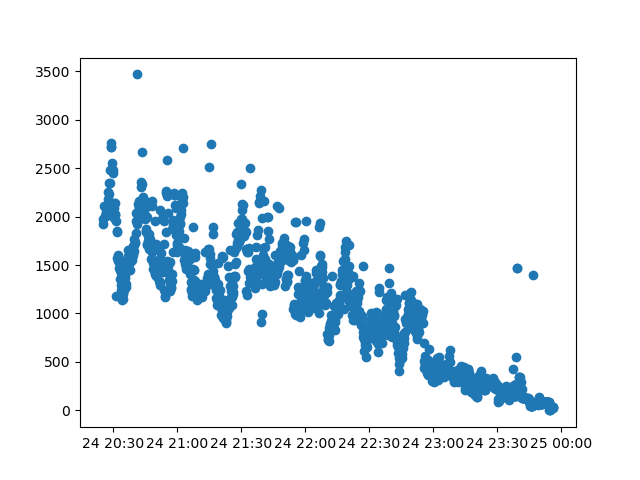

In [33]:
%matplotlib widget
#plt.figure(figsize=(20,10))
plt.plot(results_all['date'],results_all['trivial_length'],'o')

In [27]:
idx = 51;
print(idx,results_all['name'][idx],results_all['trivial_length'][idx])

51 20220624_203453 2483.9471271591156
